In [1]:
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    validation_curve_with_undersampling, plot_validation_curve_with_undersampling, fit_and_score_iteratively,\
    plot_curves
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import fbeta_score, make_scorer

In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:10000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:10000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:10000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(10000, 784) (10000, 784) (10000, 1) (10000, 1) (10000, 10) (10000, 10)


In [14]:
# no undersampling
# Baseline model

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=30, random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True)

In [15]:
print(train_res, test_res)

0.9457 0.8684


In [5]:
# no undersampling
# Baseline model

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=30, random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
print(train_res, test_res)

0.9668 0.8983


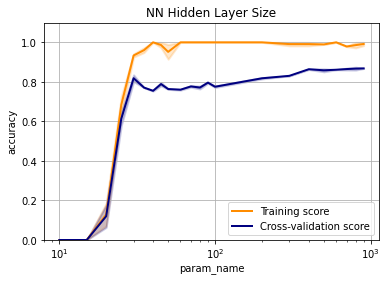

In [9]:
# optimize hidden_layer_sizes

param_range = list(range(10, 50, 5)) + list(range(50, 100, 10)) + list(range(100, 1000, 100))
cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, max_iter=2000)
train_scores, test_scores, labeled_train, labeled_test, plt = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='hidden_layer_sizes', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='NN Hidden Layer Size')


In [10]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

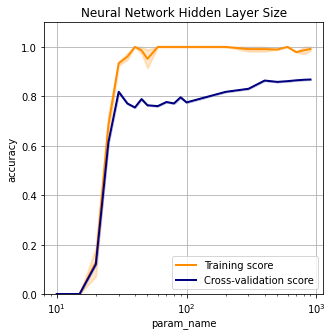

In [13]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Neural Network Hidden Layer Size',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5))

In [14]:
labeled_test

array([[1.000e+01, 0.000e+00],
       [1.500e+01, 0.000e+00],
       [2.000e+01, 1.202e-01],
       [2.500e+01, 6.132e-01],
       [3.000e+01, 8.183e-01],
       [3.500e+01, 7.710e-01],
       [4.000e+01, 7.548e-01],
       [4.500e+01, 7.889e-01],
       [5.000e+01, 7.637e-01],
       [6.000e+01, 7.604e-01],
       [7.000e+01, 7.770e-01],
       [8.000e+01, 7.713e-01],
       [9.000e+01, 7.961e-01],
       [1.000e+02, 7.754e-01],
       [2.000e+02, 8.181e-01],
       [3.000e+02, 8.305e-01],
       [4.000e+02, 8.639e-01],
       [5.000e+02, 8.584e-01],
       [6.000e+02, 8.614e-01],
       [7.000e+02, 8.648e-01],
       [8.000e+02, 8.670e-01],
       [9.000e+02, 8.681e-01]])

In [ ]:
# no undersampling
# model performance with 400 nodes in hidden layer 1

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=400, random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True)

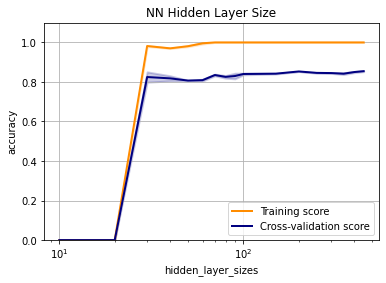

In [3]:
# optimize hidden_layer_sizes

param_range = [(400, i) for i in list(range(10, 50, 10)) + list(range(50, 100, 10)) + list(range(100, 500, 50))]

cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, max_iter=2000)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='hidden_layer_sizes', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='NN Hidden Layer Size', plot_param_index=1)


In [4]:
labeled_test

array([[ 10.    ,   0.    ],
       [ 20.    ,   0.    ],
       [ 30.    ,   0.8249],
       [ 40.    ,   0.8182],
       [ 50.    ,   0.807 ],
       [ 60.    ,   0.8091],
       [ 70.    ,   0.8351],
       [ 80.    ,   0.8258],
       [ 90.    ,   0.83  ],
       [100.    ,   0.8403],
       [150.    ,   0.8419],
       [200.    ,   0.8531],
       [250.    ,   0.8459],
       [300.    ,   0.845 ],
       [350.    ,   0.8419],
       [400.    ,   0.8501],
       [450.    ,   0.8546]])

In [5]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [11]:
_param_range =[p[1] for p in param_range]

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

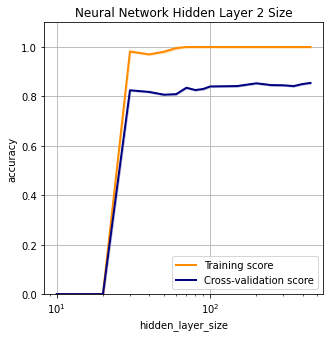

In [14]:
plot_curves(_param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Neural Network Hidden Layer 2 Size',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5), param_name='hidden_layer_size')

In [17]:
# no undersampling
# Baseline model

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(400, 200), random_state=0, max_iter=1000)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True, iterations=1)

# Activation Function

In [ ]:
classifier = MLPClassifier(solver='adam', alpha=1e-4, random_state=0, 
                           max_iter=2000, hidden_layer_sizes=(400, 200))
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Activation Function'# optimize hidden_layer_sizes

param_range = ['identity', 'logistic', 'tanh', 'relu']

cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(400, 200), alpha=1e-4, random_state=0, max_iter=2000)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='activation', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title=title, is_log_axis=False)


In [ ]:
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, 
                           max_iter=2000, hidden_layer_sizes=(400, 200))
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Neural Net Learning Curve'
plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)


